here Ang Mo Kio
flats that are older: [] 

Number of older flats  : 0 

Ratio of old flats over total flats 0.0
here Bedok
flats that are older: ['#03-104', '#08-58*', '#03-72*'] 

Number of older flats  : 3 

Ratio of old flats over total flats 0.10344827586206896
here Geylang
flats that are older: ['#16-2687*'] 

Number of older flats  : 1 

Ratio of old flats over total flats 0.02702702702702703
here Kallang / Whampoa
flats that are older: ['#12-501', '#28-501', '#02-511', '#03-504', '#06-508', '#13-525'] 

Number of older flats  : 6 

Ratio of old flats over total flats 0.23076923076923078
{'Ang Mo Kio': 10, 'Bedok': 29, 'Geylang': 37, 'Kallang / Whampoa': 26}
6
append ['Ang Mo Kio', 'Bedok', 'Geylang', 'Kallang / Whampoa'] [0.0, 0.10344827586206896, 0.02702702702702703, 0.23076923076923078] [[], [3, 8, 3], [16], [12, 28, 2, 3, 6, 13]]


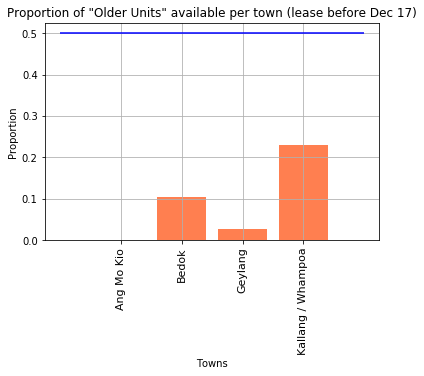

Ang Mo Kio []


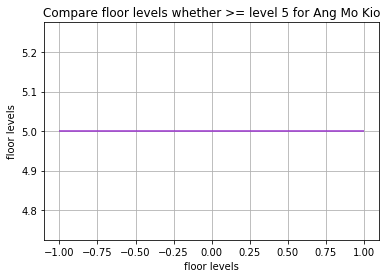

Bedok [3, 8, 3]


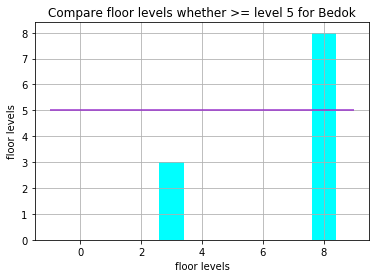

Geylang [16]


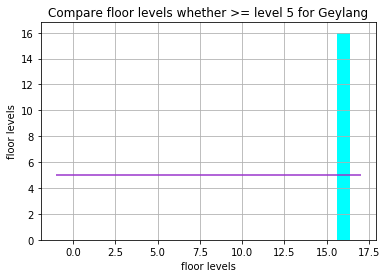

Kallang / Whampoa [12, 28, 2, 3, 6, 13]


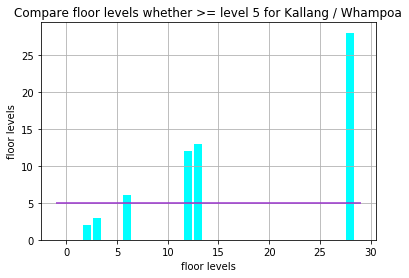

In [114]:
# this is a continuation to answer the trend we found in plot 6, why 4 of the estates have resale prices lower
# than the median price of the SBF Nov 2018
# where the threshold for the flats we take 1 dec 2017 to be considered as slightly older, because we want to test if is it
#Maturity is
# the cause to drive the resale prices down


import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
os.getcwd()

unitDetails = np.genfromtxt("Merged_unitsDetails_DistToMrt.csv", delimiter=",",skip_header=1,
                dtype=[('town','U24'),('rmType','U7'),('blk','U6'),('unitNum','U10'),
                      ('level','i4'),('sqm','i8'),
                      ('sellingPrice','i8'),('color','U12') ,('repurchasedFlat','U30'),('leaseLessThan60Yrs','U10'),
                      ('street','U30'),('probableCompletionDate','U10'),('deliveryPossessionDate','U30'),
                      ('leaseCommencementDate','U15'),('availableEthnicQuotaMl','U20'),
                      ('availableEthnicQuotaCh','U25'),('availableEthnicQuotaIn','U20'),('lastUpdate','U60'),
                      ('NearestMrt','U30'),('DistToMrt','f8'),('blkX','i8'),('blkY','i8')],
                missing_values=['na','-',''],filling_values=0, comments='!')

DistToMrt= unitDetails['DistToMrt']
town = unitDetails['town']
rmType= unitDetails['rmType']
sellingPrice=unitDetails['sellingPrice']
leaseStarting = unitDetails['leaseCommencementDate']
flatNum = unitDetails['unitNum']



# Get selling prices across towns for 4-Room flats    
labels = np.array(['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun'])
#print(data)
#print(len(data))
#print(len(labels))


########## short cut for the above rb 
allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']

output = []
for town in allTowns:
    townPrice = []
    #print('top', town)
    for unit in unitDetails:
        if unit['rmType']=='4-Room':
            if unit['repurchasedFlat']=='':
                if unit['leaseLessThan60Yrs']=='':
                    if unit['town']==town:
                        townPrice1 = unit['sellingPrice'] 
                        townPrice.append(townPrice1)
    output.append(townPrice)
#print(allTowns[11])
#print('rb output', output[11])
#print(len(output))   
#print(output)

########################################################

## Mature and Non Mature estates
estatesMaturity  = np.genfromtxt("Number of Applications Received for 3-room and bigger flats as at 19 Nov 2018.csv", delimiter=",",skip_header=1,
                dtype=[('town','U24'),('FlatType','U50'),('No_of_Units','i8'),('Number_of_applicants','i8'),
                      ('Rate_Non_Elderly_First_timers','f8'),('Rate_Non_Elderly_Second_timers','f8'),
                      ('Rate_Non_Elderly_Overall','f8'),('Mature_Estates','U8')],
                missing_values=['na','-','','NA'],filling_values=0)

estatesMaturityTown= estatesMaturity['town']
estatesMaturityMature= estatesMaturity['Mature_Estates']



estatesMaturityCon= zip(estatesMaturityTown,estatesMaturityMature)

# make unique sets of 'towns' and 'Mature Estates'
estatesMaturityCon =set(estatesMaturityCon)

# Mature and Non Mature estates


nMature = []
yMature = []


for town in estatesMaturityCon:
    if town[1]=='N':
        nMature.append(town[0])
    elif town[1]=='Y':
        yMature.append(town[0])
nMature.append('Jurong East')
nMature.append('Jurong West')
nMature.remove('Jurong East / West')
#print("Mature estates : \n{}".format(yMature))
#print("Non Mature estates : \n{}".format(nMature))





#subset as debugger
#dataSubset = [amkPrice, bbPrice,hgPrice,jePrice,jwPrice,kwnPrice,prcPrice,skPrice]
#print('kwn', kwnPrice)
#print('jw', jwPrice)
#print(dataSubset)


    

Mature = []
for repeatMature in range(len(yMature)):
    Mature.append('Mature')


NonMature = []
for repeatMature in range(len(yMature)):
    NonMature.append('Non Mature')





## Making labels in order
label = yMature + nMature

# Make different colour for Mature and Non Mature estates  
values= Mature + NonMature
keys = label

##########################################################################
# Import median resale flat price data set from data.gov.sg
medianPrice = np.genfromtxt("median-resale-pricesby-town-and-flat-type.csv", delimiter=",",skip_header=1,
                dtype=[('quarter','U8'),('town','U50'),('flat_type','U20'),('price','f8')],
                missing_values=['na','-',''],filling_values=0, comments='!')
#print('medianPrice',medianPrice)

midPrice_town = []
midPrice_price=[]
for mid in medianPrice:
    if mid['quarter']=='2018-Q3':
        if mid['flat_type']=='4-room':
            midPrice_town.append(mid['town'])
            midPrice_price.append(mid['price']) 
midTownNPrice = dict(zip(midPrice_town,midPrice_price))

##############################################################################
# only filter out towns where median is lower than median for resale in Q3
townsWithMedianLowerthanResale = []
townsWithMedianHigherthanResale = []
#print(midTownNPrice)
for town in allTowns:
    #if np.median(unitDetails['sellingPrice'])< medianPrice['price']:
    thisTownUnitDetails = unitDetails[unitDetails['town'] == town] #select by town
    #print(town, thisTownUnitDetails)
    
    thisTownMedianSellingPrice = np.median(thisTownUnitDetails['sellingPrice']) #median of sellingPrice
    #print(town, thisTownMedianSellingPrice)
    
    if thisTownMedianSellingPrice <= midTownNPrice[town]:
        #print('thisTownMedian: ', thisTownMedianSellingPrice, ' <= median resale: ', midTownNPrice[town])
        townsWithMedianLowerthanResale.append(town)
    elif thisTownMedianSellingPrice > midTownNPrice[town]: # dictionary calling a key variable
        #print('thisTownMedian: ', thisTownMedianSellingPrice, ' > median resale: ', midTownNPrice[town])
        townsWithMedianHigherthanResale.append(town)
    else:
        raise ValueError('Data is missing')
        

        
####################################################################################
# for Towns in townsWithMedianHigherthanResale , find out how many leasedate is earlier than 2010 (to put a gauge on 
#which is "older")

leaseDateThresholdDate = '1-Dec-17' # same format as csv
leaseDateThresholdObj = datetime.strptime(leaseDateThresholdDate, '%d-%b-%y')


totalNumFlats = {}  # creating dictionary
appendtown = []
appendratio = [] 
appendLevel =[]
for town in  townsWithMedianHigherthanResale: 
    print('=========') # print partition
    print('here', town) # print town names
    totalNumFlats[town]=0 #key is town
    flat_town=[]
    countOfUnits_town = 0
    level_town =[]
    for unit in unitDetails:
        #print(unit)
        if unit['town']== town and unit['rmType']=='4-Room' :
            #print(unit)
            totalNumFlats[town]=totalNumFlats[town]+1
            leaseStartingDate = unit['leaseCommencementDate']
            try:
                leaseStartingDateObj = datetime.strptime(leaseStartingDate, '%d-%b-%y') # convert to datetime here
                
                #print('leaseStartingDate', leaseStartingDate, leaseStartingDateObj)
                if leaseStartingDateObj < leaseDateThresholdObj : # want to know which flats are slightly old
                    #print('inside if, to append')
                    flat_town.append(unit['unitNum'])  # not that townToMrt is not a array
                    countOfUnits_town= countOfUnits_town + 1
                    level_town.append(unit['level'])
            except ValueError: # some date format is not in the standard form
                #print('leaseStartingDate error: ', leaseStartingDate)
                continue # skip this, ignore those rows
                
    print("flats that are older: {} \n".format(flat_town))
    print("Number of older flats  : {} \n".format(countOfUnits_town))
    try:
        ratioPerTown = countOfUnits_town/totalNumFlats[town]
    except ValueError:
        ratioPerTown = 999999999
    
    print("Ratio of old flats over total flats",ratioPerTown)
   
    appendtown.append(town)
    appendratio.append(ratioPerTown)
    appendLevel.append(level_town)
print(totalNumFlats)
print(countOfUnits_town)
print('append',appendtown,appendratio,appendLevel)


###############################################################################
# ratio plot

plt.grid(True)
plt.bar(appendtown,appendratio,color='coral')
plt.hlines(0.5,-1,4,colors='b')
plt.xticks(fontsize=11,rotation='vertical')
plt.title('Proportion of "Older Units" available per town (lease before Dec 17)')
plt.xlabel('Towns')
plt.ylabel('Proportion')
plt.show()
###############################################################################
# level plot (for 2nd hypothesis since first one did not work out well)

for town, floor in  zip(townsWithMedianHigherthanResale, appendLevel):  
    # level plot
    plt.figure() # 2nd figure
    plt.grid(True)
    print(town, floor)
    try:
        listtownMaxfloor =max(floor)
    except ValueError:
        listtownMaxfloor= 0
    plt.bar(floor, floor,color='aqua')
    plt.hlines(5,-1,listtownMaxfloor+1,colors='darkorchid')
    plt.title('Compare floor levels whether >= level 5 for {}'.format(town))
    plt.xlabel('floor levels')
    plt.ylabel('floor levels')
    plt.show()
    

print()

# link: https://www.hdb.gov.sg/cs/infoweb/hdbspeaks/differing-prices-for-bto-flats-in-the-same-town
# https://dollarsandsense.sg/sales-balance-flats-vs-re-offer-balance-flats-whats-difference/

## conclusion : resale price thought to be higher than SALE OF BALANCE. Resale price lower than median of SBF for some matured estates
## Some Q3 have values coz it was based on Q3 but our SBF is based on Nov 2018
# Based on the threshold of 1 Dec 2017, we determined that the proportion of older units in the estates are generally quite few

# Since maturity of the flats is not a factor
# we move on to analyse whether the levels plays a role
# We determined that most of the units are actually quite high level (>level 5) and hence are quite well sought after.
# This could be a factor to drive the median prices up. 







{}
0
append [] [] []


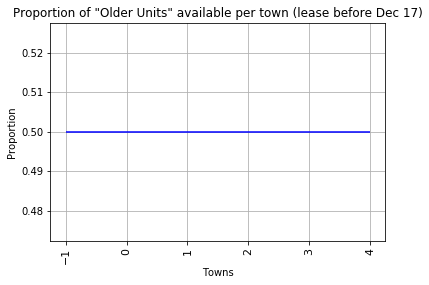

In [113]:
# this is a continuation to answer the trend we found in plot 6, why 4 of the estates have resale prices lower
# than the median price of the SBF Nov 2018
# where the threshold for the flats we take 1 dec 2017 to be considered as slightly older, because we want to test if is it Maturity is
# the cause to drive the resale prices down


import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
os.getcwd()
# TO get a boxplot to see the number of 5-Rooms flats available for Nov 2018 Sale of balance flats

unitDetails = np.genfromtxt("Merged_unitsDetails_DistToMrt.csv", delimiter=",",skip_header=1,
                dtype=[('town','U24'),('rmType','U7'),('blk','U6'),('unitNum','U10'),
                      ('level','i4'),('sqm','i8'),
                      ('sellingPrice','i8'),('color','U12') ,('repurchasedFlat','U30'),('leaseLessThan60Yrs','U10'),
                      ('street','U30'),('probableCompletionDate','U10'),('deliveryPossessionDate','U30'),
                      ('leaseCommencementDate','U15'),('availableEthnicQuotaMl','U20'),
                      ('availableEthnicQuotaCh','U25'),('availableEthnicQuotaIn','U20'),('lastUpdate','U60'),
                      ('NearestMrt','U30'),('DistToMrt','f8'),('blkX','i8'),('blkY','i8')],
                missing_values=['na','-',''],filling_values=0, comments='!')

DistToMrt= unitDetails['DistToMrt']
town = unitDetails['town']
rmType= unitDetails['rmType']
sellingPrice=unitDetails['sellingPrice']
leaseStarting = unitDetails['leaseCommencementDate']
flatNum = unitDetails['unitNum']



# Get selling prices across towns for 5-Room flats    
#print(amkPrice)
#print(bdPrice)
#data = [amkPrice,bdPrice,bbPrice,bmPrice,bpPrice,cckPrice,clPrice,glPrice,hgPrice,jePrice,jwPrice
#       ,kwnPrice,prcPrice,pgPrice,qtPrice,sbPrice,skPrice,sgnPrice,tapPrice,tpPrice,wlPrice,ysPrice]
labels = np.array(['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun'])
#print(data)
#print(len(data))
#print(len(labels))


########## short cut for the above rb 
#allTowns = ['Ang Mo Kio','Bedok','Bukit Batok','Bukit Merah','Bukit Panjang','Choa Chu Kang',
#                'Clementi','Geylang','Hougang','Jurong East','Jurong West','Kallang / Whampoa','Pasir Ris','Punggol',
#                'Queenstown','Sembawang','Sengkang','Serangoon','Tampines','Toa Payoh', 'Woodlands','Yishun']

output = []
for town in allTowns:
    townPrice = []
    #print('top', town)
    for unit in unitDetails:
        if unit['rmType']=='5-Room':
            if unit['repurchasedFlat']=='':
                if unit['leaseLessThan60Yrs']=='':
                    if unit['town']==town:
                        townPrice1 = unit['sellingPrice'] 
                        townPrice.append(townPrice1)
    output.append(townPrice)
#print(allTowns[11])
#print('rb output', output[11])
#print(len(output))   
#print(output)

########################################################

## Mature and Non Mature estates
estatesMaturity  = np.genfromtxt("Number of Applications Received for 3-room and bigger flats as at 19 Nov 2018.csv", delimiter=",",skip_header=1,
                dtype=[('town','U24'),('FlatType','U50'),('No_of_Units','i8'),('Number_of_applicants','i8'),
                      ('Rate_Non_Elderly_First_timers','f8'),('Rate_Non_Elderly_Second_timers','f8'),
                      ('Rate_Non_Elderly_Overall','f8'),('Mature_Estates','U8')],
                missing_values=['na','-','','NA'],filling_values=0)

estatesMaturityTown= estatesMaturity['town']
estatesMaturityMature= estatesMaturity['Mature_Estates']



estatesMaturityCon= zip(estatesMaturityTown,estatesMaturityMature)

# make unique sets of 'towns' and 'Mature Estates'
estatesMaturityCon =set(estatesMaturityCon)
#print(estatesMaturityCon)
#print(len(estatesMaturityCon))
#print(estatesMaturityCon)

#print(estatesMaturity['town'])
#print(estatesMaturity['Mature_Estates'])

# Mature and Non Mature estates


nMature = []
yMature = []


for town in estatesMaturityCon:
    if town[1]=='N':
        nMature.append(town[0])
    elif town[1]=='Y':
        yMature.append(town[0])
nMature.append('Jurong East')
nMature.append('Jurong West')
nMature.remove('Jurong East / West')
#print("Mature estates : \n{}".format(yMature))
#print("Non Mature estates : \n{}".format(nMature))





#subset as debugger
#dataSubset = [amkPrice, bbPrice,hgPrice,jePrice,jwPrice,kwnPrice,prcPrice,skPrice]
#print('kwn', kwnPrice)
#print('jw', jwPrice)
#print(dataSubset)


    

Mature = []
for repeatMature in range(len(yMature)):
    Mature.append('Mature')


NonMature = []
for repeatMature in range(len(yMature)):
    NonMature.append('Non Mature')





## Making labels in order
label = yMature + nMature

# Make different colour for Mature and Non Mature estates  
values= Mature + NonMature
keys = label

##########################################################################
# Import median resale flat price data set from data.gov.sg
medianPrice = np.genfromtxt("median-resale-pricesby-town-and-flat-type.csv", delimiter=",",skip_header=1,
                dtype=[('quarter','U8'),('town','U50'),('flat_type','U20'),('price','f8')],
                missing_values=['na','-',''],filling_values=0, comments='!')
#print('medianPrice',medianPrice)

midPrice_town = []
midPrice_price=[]
for mid in medianPrice:
    if mid['quarter']=='2018-Q3':
        if mid['flat_type']=='5-room':
            midPrice_town.append(mid['town'])
            midPrice_price.append(mid['price']) 
midTownNPrice = dict(zip(midPrice_town,midPrice_price))
#print(midTownNPrice)
##############################################################################
# only filter out towns where median is lower than median for resale in Q3
townsWithMedianLowerthanResale = []
townsWithMedianHigherthanResale = []

###########################################################################
# Take out towns with 5-Room Flats
allTowns=[]
for i in unitDetails:
    if i['rmType']=='5-Room':
        allTowns.append(i['town'])
        
#print(midTownNPrice)
for town in allTowns:
    #if np.median(unitDetails['sellingPrice'])< medianPrice['price']:
    thisTownUnitDetails = unitDetails[unitDetails['town'] == town] #select by town
    #print(town, thisTownUnitDetails)
    
    thisTownMedianSellingPrice = np.median(thisTownUnitDetails['sellingPrice']) #median of sellingPrice
    #print(town, thisTownMedianSellingPrice)
    
    if thisTownMedianSellingPrice <= midTownNPrice[town]:
        #print('thisTownMedian: ', thisTownMedianSellingPrice, ' <= median resale: ', midTownNPrice[town])
        townsWithMedianLowerthanResale.append(town)
    elif thisTownMedianSellingPrice > midTownNPrice[town]: # dictionary calling a key variable
        #print('thisTownMedian: ', thisTownMedianSellingPrice, ' > median resale: ', midTownNPrice[town])
        townsWithMedianHigherthanResale.append(town)
    else:
        raise ValueError('Data is missing')
        
        
#print('Towns with median SBF prices <= median resale 2018Q3 price', townsWithMedianLowerthanResale)
#print('Towns with median SBF prices > median resale 2018Q3 price', townsWithMedianHigherthanResale)
        
####################################################################################
# for Towns in townsWithMedianHigherthanResale , find out how many leasedate is earlier than 2010 (to put a gauge on 
#which is "older")

leaseDateThresholdDate = '1-Dec-17' # same format as csv
leaseDateThresholdObj = datetime.strptime(leaseDateThresholdDate, '%d-%b-%y')

#for towns in townsWithMedianHigherthanResale:
#    dateleaseTownsWMedianHigher = unitDetails[unitDetails['town']==towns]['leaseCommencementDate']
#print(dateleaseTownsWMedianHigher)

#neededColumns=list(zip(town,rmType,DistToMrt,sellingPrice, leaseStarting, flatNum))
#print('here townasdsada', town)
#flat_town = []
#countOfUnits_town = 0
totalNumFlats = {}  # creating dictionary
appendtown = []
appendratio = [] 
appendLevel =[]
for town in  townsWithMedianHigherthanResale: 
    print(town)
    print('=========') # print partition
    print('here', town) # print town names
    totalNumFlats[town]=0 #key is town
    flat_town=[]
    countOfUnits_town = 0
    level_town =[]
    for unit in unitDetails:
        #print(unit)
        if unit['town']== town and unit['rmType']=='5-Room' :
            #print(unit)
            totalNumFlats[town]=totalNumFlats[town]+1
            leaseStartingDate = unit['leaseCommencementDate']
            try:
                leaseStartingDateObj = datetime.strptime(leaseStartingDate, '%d-%b-%y') # convert to datetime here
                
                #print('leaseStartingDate', leaseStartingDate, leaseStartingDateObj)
                if leaseStartingDateObj < leaseDateThresholdObj : # want to know which flats are slightly old
                    #print('inside if, to append')
                    flat_town.append(unit['unitNum'])  # not that townToMrt is not a array
                    countOfUnits_town= countOfUnits_town + 1
                    level_town.append(unit['level'])
            except ValueError: # some date format is not in the standard form
                #print('leaseStartingDate error: ', leaseStartingDate)
                continue # skip this, ignore those rows
                
    print("flats that are older: {} \n".format(flat_town))
    print("Number of older flats  : {} \n".format(countOfUnits_town))
    try:
        ratioPerTown = countOfUnits_town/totalNumFlats[town]
    except ZeroDivisionError:
        ratioPerTown = []
    
    print("Ratio of old flats over total flats",ratioPerTown)
   
    appendtown.append(town)
    appendratio.append(ratioPerTown)
    appendLevel.append(level_town)
print(totalNumFlats)
print(countOfUnits_town)
print('append',appendtown,appendratio,appendLevel)


###############################################################################
# ratio plot

plt.grid(True)
plt.bar(appendtown,appendratio,color='coral')
plt.hlines(0.5,-1,4,colors='b')
plt.xticks(fontsize=11,rotation='vertical')
plt.title('Proportion of "Older Units" available per town (lease before Dec 17)')
plt.xlabel('Towns')
plt.ylabel('Proportion')
plt.show()
###############################################################################
# level plot (for 2nd hypothesis since first one did not work out well)

for town, floor in  zip(townsWithMedianHigherthanResale, appendLevel):  
    # level plot
    plt.figure() # 2nd figure
    plt.grid(True)
    print(town, floor)
    try:
        listtownMaxfloor =max(floor)
    except ValueError:
        listtownMaxfloor= 0
    plt.bar(floor, floor,color='aqua')
    plt.hlines(5,-1,listtownMaxfloor+1,colors='darkorchid')
    plt.title('Compare floor levels whether >= level 5')
    plt.xlabel('floor levels')
    plt.ylabel('floor levels')
    plt.show()
    

print()

# link: https://www.hdb.gov.sg/cs/infoweb/hdbspeaks/differing-prices-for-bto-flats-in-the-same-town
# https://dollarsandsense.sg/sales-balance-flats-vs-re-offer-balance-flats-whats-difference/

## conclusion : resale price thought to be higher than SALE OF BALANCE. Resale price lower than median of SBF for some matured estates
## Some Q3 have values coz it was based on Q3 but our SBF is based on Nov 2018
# Based on the threshold of 1 Dec 2017, we determined that the proportion of older units in the estates are generally quite few

# Since maturity of the flats is not a factor
# we move on to analyse whether the levels plays a role
# We determined that most of the units are actually quite high level (>level 5) and hence are quite well sought after.
# This could be a factor to drive the median prices up. 





